In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Чтение файла с данными
df = pd.read_json("data.json")
df.head()
#df.tail()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
# Структура данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


Text(0, 0.5, 'Кухня')

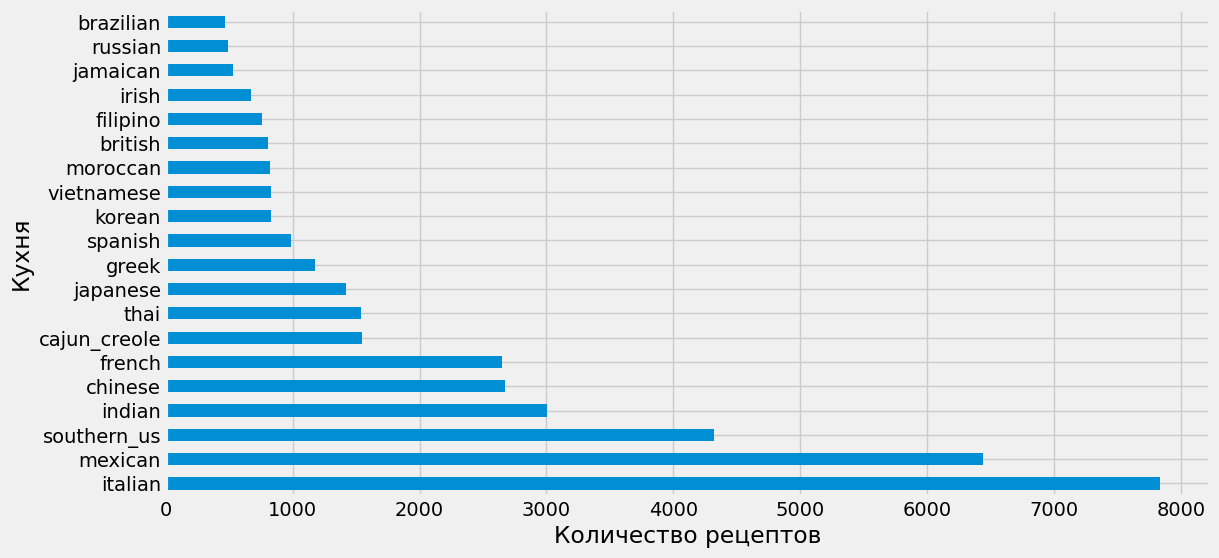

In [4]:
# Как часто встречаются кухни той или иной страны
%matplotlib inline
plt.style.use("fivethirtyeight")
df["cuisine"].value_counts().plot(kind="barh", figsize=(12, 6))

plt.xlabel("Количество рецептов")
plt.ylabel("Кухня")

In [6]:
# Счетчик количества повторений каждого ингредиента в каждой кухне
from collections import Counter
counters = {}
for cuisine in df["cuisine"].unique():
    counters[cuisine] = Counter()
    indices = df["cuisine"] == cuisine
    for ingredients in df[indices]["ingredients"]:
        counters[cuisine].update(ingredients)
        
# Самые часто встречающиеся ингредиенты       
print(counters["indian"].most_common(5))
top5 = pd.DataFrame(
    [[items[0] for items in counters[cuisine].most_common(5)] for cuisine in counters],
    index=[cuisine for cuisine in counters],
    columns=["top{}".format(i) for i in range(1, 6)],
)
display(top5)

[('salt', 1934), ('onions', 1195), ('garam masala', 862), ('water', 820), ('ground turmeric', 728)]


,top1,top2,top3,top4,top5
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles
southern_us,salt,butter,all-purpose flour,sugar,large eggs
filipino,salt,garlic,water,onions,soy sauce
indian,salt,onions,garam masala,water,ground turmeric
jamaican,salt,onions,water,garlic,ground allspice
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic
mexican,salt,onions,ground cumin,garlic,olive oil
chinese,soy sauce,sesame oil,salt,corn starch,sugar
british,salt,all-purpose flour,butter,milk,eggs


In [7]:
# Количество ингредиентов в рецепте
df['num_ing'] = df['ingredients'].str.len()
num_ing = df['num_ing'].to_numpy()
print("Среднее кол-во ингредиентов в рецепте:",np.mean(num_ing))
df.head()

Среднее кол-во ингредиентов в рецепте: 10.76771257605471


,id,cuisine,ingredients,num_ing
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20


Text(0, 0.5, 'Количество рецептов')

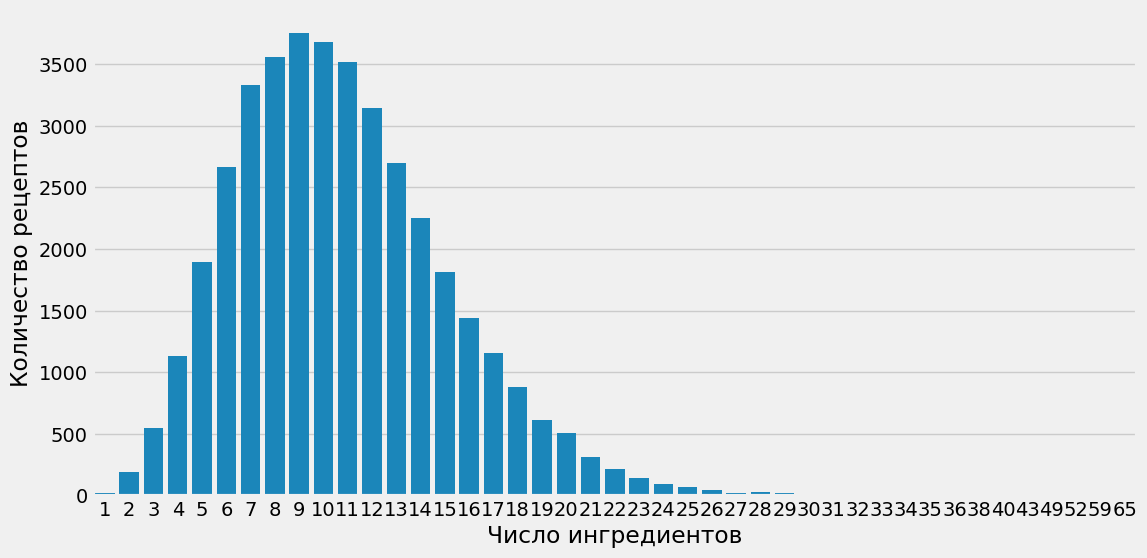

In [8]:
# Количество рецептов от числа ингредиентов
plt.figure(figsize=(12,6))
sns.countplot(x = 'num_ing', data = df)
plt.xlabel("Число ингредиентов")
plt.ylabel("Количество рецептов")

In [9]:
# Процентное содержание рецептов длиной болшье чем i (23)
i = 23
longrecip = df[df['num_ing'] >= i]
longrecip1 = df[df['num_ing'] < i]

print(len(longrecip)/(len(longrecip) + len(longrecip1))*100)

1.1892190878463318


In [10]:
# Cамый длинный рецепт
print(longrecip[longrecip['num_ing'] == 65]['ingredients'].values)
print('Cuisine :-',longrecip[longrecip['num_ing'] == 65]['cuisine'].values)

[list(['fettucine', 'fresh marjoram', 'minced garlic', 'olive oil', 'garlic powder', 'large eggs', 'Alfredo sauce', 'vegetable oil', 'cajun seasoning', 'shredded romano cheese', 'basil dried leaves', 'salt', 'cayenne pepper', 'scallions', 'red bell pepper', 'boneless skinless chicken breast halves', 'soba', 'pasta sauce', 'kosher salt', 'milk', 'fresh ginger', 'ground black pepper', 'flour', 'cooked chicken', 'coarse salt', 'lemon', 'diced tomatoes', 'garlic', 'rice vinegar', 'Neufchâtel', 'garlic cloves', 'dried parsley', 'frozen artichoke hearts', 'penne', 'pepper', 'sweet onion', 'part-skim mozzarella cheese', 'parmigiano reggiano cheese', 'basil leaves', 'onion powder', 'red wine vinegar', 'red pepper flakes', 'orzo', 'crushed red pepper', 'all-purpose flour', 'freshly ground pepper', 'sliced mushrooms', 'panko breadcrumbs', 'plum tomatoes', 'fresh basil', 'fresh leav spinach', 'water', 'sun-dried tomatoes', 'ground pepper', 'grated parmesan cheese', 'boneless skinless chicken brea

In [11]:
# "Рецепты" с количеством ингредиентов меньше единицы
df[df['num_ing'] <= 1]

,id,cuisine,ingredients,num_ing
88,17004,korean,"[water, barley]",2
143,29853,mexican,"[granulated sugar, large egg whites]",2
445,8304,italian,"[aged gouda, soppressata]",2
940,4734,japanese,[sushi rice],1
970,36852,italian,"[melted butter, potatoes]",2
...,...,...,...,...
38897,19077,vietnamese,"[shallots, salad oil]",2
38966,28903,filipino,"[adobo, cooking oil]",2
39031,7984,italian,"[olive oil, fresh basil leaves]",2
39035,27327,british,"[puff pastry, minced meat]",2


In [12]:
# Оставляем только рецепты с количеством ингредиентов более двух, но меньше 23
i_2 = df[df['num_ing'] <= 2].index
df = df.drop(i_2)
i_24 = df[df['num_ing'] >= 23].index
df = df.drop(i_24)

In [15]:
string = '!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~’0123456789'

# Создание новой таблицы
new_df = df[['id', 'cuisine']].copy()
new_ingredients = []
for list_ingredients in df['ingredients']:
  # Привод ингредиентов к нижнему регистру
  my_list = [x.lower() for x in list_ingredients]
  l_i = []
  for ingredient in my_list:
    ingredient_0 = ingredient
    for p in string:
      while p in ingredient_0:
        ingredient_0 = ingredient_0.replace(p, '')
    l_i.append(ingredient_0)
  new_ingredients.append(l_i)

new_df['ingredients'] = new_ingredients
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39086 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39086 non-null  int64 
 1   cuisine      39086 non-null  object
 2   ingredients  39086 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [16]:
# Список всех ингредиентов
all_ing = [ing for ingredients in new_df['ingredients'] for ing in ingredients]
print('Количество всех ингредиентов:', len(all_ing))

# Список уникальных ингредиентов
all_ingredients = list(set(all_ing))
print('Количество уникальных ингредиентов:', len(all_ingredients))

Количество всех ингредиентов: 415624
Количество уникальных ингредиентов: 6637


In [17]:
# Удаляем ингредиенты длиной менее двух букв
false_ingredients = [ingredient for ingredient in all_ingredients if len(ingredient) <= 2]
print(false_ingredients)
for p in false_ingredients:
  all_ingredients.remove(p)
print('len unique ingredients:', len(all_ingredients))

['mi', 'v']
len unique ingredients: 6635


In [19]:
# Создание рабочей таблицы
df_cuisine = new_df[['id', 'cuisine']].copy()

for p in all_ingredients:
  value = []
  for list_ingredients in new_df['ingredients']:
    if p in list_ingredients:
      value.append(1)
    else:
      value.append(0)
  df_cuisine[p] = np.array(value)
  
df_cuisine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39086 entries, 0 to 39773
Columns: 6637 entries, id to organic vegetable stock
dtypes: int32(6635), int64(1), object(1)
memory usage: 990.2+ MB


ОБУЧЕНИЕ

In [20]:
# Импорт библиотек для обучения
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [21]:
# x - входные данные (набор ингредиентов)
# y - выход (кухня)
y = df_cuisine.cuisine # столбец кухня
x = df_cuisine.drop('cuisine', axis=1) # все, кроме кухни

# Разделение на тренировочную и тестовую выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [22]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
LR_score = accuracy_score(y_test, y_pred)
print('Количество тестовых данных:', len(y_test))
print('Score:', LR_score)

pd.DataFrame(data = confusion_matrix(y_test, y_pred), columns=model.classes_, index=model.classes_)

Количество тестовых данных: 11726
Score: 0.19588947637728127


,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
brazilian,0,0,0,0,0,0,0,0,0,130,0,0,0,0,0,0,0,0,0,0
british,0,0,0,0,0,0,0,0,0,252,0,0,0,0,0,0,0,0,0,0
cajun_creole,0,0,0,0,0,0,0,0,0,413,0,0,0,0,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,798,0,0,0,0,0,0,0,0,0,0
filipino,0,0,0,0,0,0,0,0,0,239,0,0,0,0,0,0,0,0,0,0
french,0,0,0,0,0,0,0,0,0,782,0,0,0,0,0,0,0,0,0,0
greek,0,0,0,0,0,0,0,0,0,366,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,860,0,0,0,0,0,0,0,0,0,0
irish,0,0,0,0,0,0,0,0,0,208,0,0,0,0,0,0,0,0,0,0
italian,0,0,0,0,0,0,0,0,0,2297,0,0,0,0,0,0,0,0,0,0


In [23]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
RFC_score = accuracy_score(y_test, y_pred)
print('Количество тестовых данных:', len(y_test))
print('Score:', RFC_score)

pd.DataFrame(data = confusion_matrix(y_test, y_pred), columns=model.classes_, index=model.classes_)

Количество тестовых данных: 11726
Score: 0.7062084257206208


,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
brazilian,47,0,0,0,3,3,0,4,0,19,2,2,0,30,0,0,14,1,5,0
british,0,43,0,2,0,48,1,8,14,35,0,0,0,7,0,1,93,0,0,0
cajun_creole,1,0,256,1,2,8,0,3,0,56,0,0,0,16,0,3,67,0,0,0
chinese,1,0,0,698,2,5,0,10,0,26,0,15,6,9,1,0,12,0,9,4
filipino,2,2,0,39,108,2,0,8,3,23,2,3,2,11,0,0,22,2,6,4
french,0,7,5,4,1,356,2,7,4,266,0,2,1,16,2,1,100,7,1,0
greek,0,0,0,1,0,12,183,11,1,129,0,0,0,12,2,0,13,2,0,0
indian,0,0,0,5,1,3,3,757,1,20,1,2,0,37,10,0,14,0,6,0
irish,0,5,1,4,0,33,1,3,50,22,0,0,0,12,0,1,76,0,0,0
italian,1,6,2,1,0,67,15,4,2,2104,0,1,0,34,1,1,55,2,1,0


In [25]:
model = KNeighborsClassifier(n_neighbors = 450)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
KNN_score = accuracy_score(y_test,y_pred)
print('Количество тестовых данных:', len(y_test))
print('Score:', KNN_score)

pd.DataFrame(data = confusion_matrix(y_test, y_pred), columns=model.classes_, index=model.classes_)

Количество тестовых данных: 11726
Score: 0.19324577861163228


,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
brazilian,0,0,0,0,0,0,0,0,0,115,0,0,0,15,0,0,0,0,0,0
british,0,0,0,0,0,0,0,0,0,233,0,0,0,19,0,0,0,0,0,0
cajun_creole,0,0,0,0,0,0,0,0,0,376,0,0,0,37,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,725,0,0,0,73,0,0,0,0,0,0
filipino,0,0,0,0,0,0,0,0,0,215,0,0,0,24,0,0,0,0,0,0
french,0,0,0,0,0,0,0,0,0,686,0,0,0,96,0,0,0,0,0,0
greek,0,0,0,0,0,0,0,0,0,328,0,0,0,38,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,776,0,0,0,84,0,0,0,0,0,0
irish,0,0,0,0,0,0,0,0,0,186,0,0,0,22,0,0,0,0,0,0
italian,0,0,0,0,0,0,0,0,0,2091,0,0,0,206,0,0,0,0,0,0


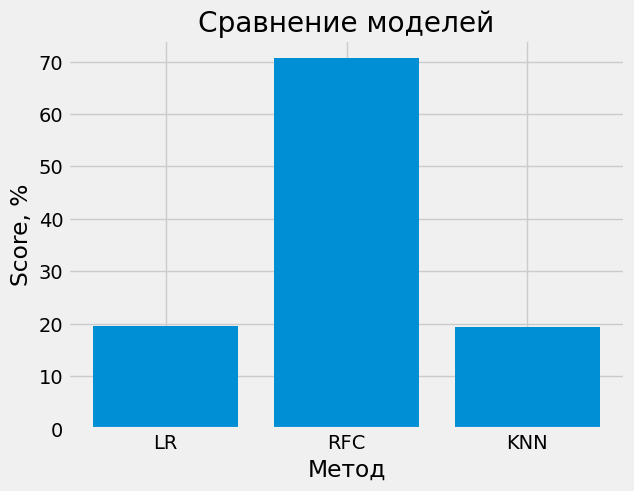

In [26]:
LR_score, RFC_score, KNN_score = 0.19588947637728127, 0.7062084257206208, 0.19324577861163228
x = ['LR', 'RFC', 'KNN']
y = [LR_score*100, RFC_score*100, KNN_score*100]
plt.bar(x, y)
plt.xlabel("Метод")
plt.ylabel("Score, %")
plt.title("Сравнение моделей")
plt.show()

ПОДБОР ГИПЕРПАРАМЕТРОВ

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
model = LogisticRegression()

C = np.logspace(1, 2, 15)
param_grid = {'C' : C}

gs = GridSearchCV(model, param_grid, cv = 3, verbose=True, n_jobs=-1)
gs.fit(x_train, y_train)
best_param = gs.best_estimator_
LR_optim = gs.best_score_
print(best_param)
print(LR_optim)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
LogisticRegression(C=10.0)
0.19996345029239768


In [29]:
model = RandomForestClassifier()

n_estimators = np.arange(50,450,50)
param_grid = {'n_estimators': n_estimators}

gs = GridSearchCV(model, param_grid, cv = 3, verbose=True, n_jobs=-1)
gs.fit(x_train, y_train)
best_param = gs.best_estimator_
RFC_optim = gs.best_score_
print(best_param)
print(RFC_optim)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
RandomForestClassifier(n_estimators=350)
0.6953216374269006


In [30]:
model = KNeighborsClassifier()

n_neighbors = np.arange(350,650,50)
param_grid = {'n_neighbors': n_neighbors}

gs = GridSearchCV(model, param_grid, cv = 3, verbose=True, n_jobs=-1)
gs.fit(x_train, y_train)
best_param = gs.best_estimator_
KNN_optim = gs.best_score_
print(best_param)
print(KNN_optim)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
KNeighborsClassifier(n_neighbors=550)
0.1963084795321637


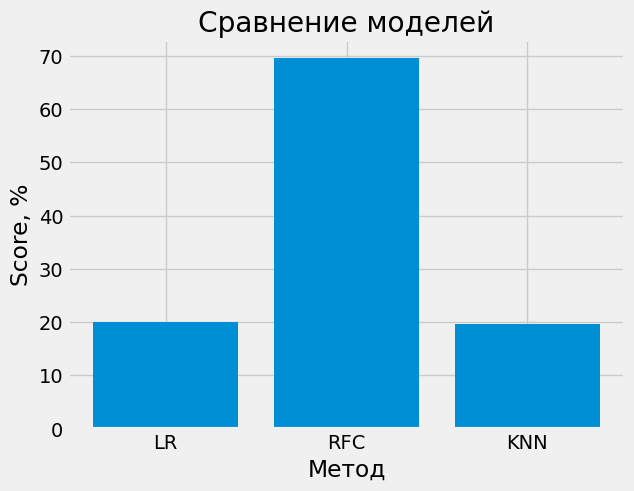

In [31]:
LR_optim, RFC_optim, KNN_optim = 0.19996345029239768, 0.6953216374269006, 0.1963084795321637
x= ['LR', 'RFC', 'KNN']
y= [LR_optim*100, RFC_optim*100, KNN_optim*100]
plt.bar(x, y)
plt.xlabel("Метод")
plt.ylabel("Score, %")
plt.title("Сравнение моделей")
plt.show()

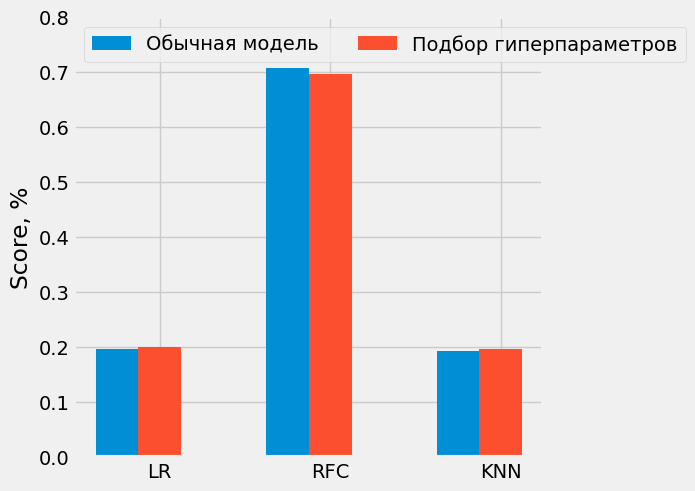

In [43]:
species = ("LR", "RFC", "KNN")
penguin_means = {
    'Обычная модель': (LR_score, RFC_score, KNN_score),
    'Подбор гиперпараметров': (LR_optim, RFC_optim, KNN_optim),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Score, %')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 0.8)

plt.show()

In [ ]:
import gc
gc.collect()

2763